# 💘 Lovely JAX

> After all, you are only human.

::: {.content-visible when-format="markdown"}

[![](https://alexey.work/badge/)](https://alexey.work/?ref=lj-md)

## [Read full docs](https://xl0.github.io/lovely-jax) | ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors) | 💟 [Lovely `NumPy`](https://github.com/xl0/lovely-numpy) | [Discord](https://discord.gg/4NxRV7NH)
:::

::: {.content-visible when-format="html"}
<a href="https://alexey.work?ref=lj-html"> <img src="https://alexey.work/badge"></a>

<h2><a href="https://github.com/xl0/lovely-jax">Source code</a> | ❤️ <a href="https://xl0.github.io/lovely-tensors"> Lovely Tensors</a> | 💟 <a href="https://xl0.github.io/lovely-numpy"> Lovely <tt>NumPy</tt></a> | <a href="https://discord.gg/4NxRV7NH">Discord</a>
</h2>
:::


## Note: I'm pretty new to JAX
If something does not make sense, shoot me an [Issue](https://github.com/xl0/lovely-jax/issues) or ping me on Discord and let me know how it's supposed to work!

Better support for sharded arrays and solid jit/pmap/vmap support coming soon!

## Install

```sh
pip install lovely-jax
```

## How to use

In [ ]:
# |hide
import os
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["XLA_FLAGS"] = '--xla_force_host_platform_device_count=8'

import warnings
import numpy as np
from matplotlib import rcParams, pyplot as plt
import jax, jax.numpy as jnp


In [ ]:
# |hide
# Suppress JAX fork warning when running shell commands
warnings.filterwarnings('ignore', category=RuntimeWarning, message='.*os.fork.*')

np.set_printoptions(linewidth=120, precision=3)
numbers = jnp.load("mysteryman.npy")
numbers1 = numbers.transpose(1,2,0)

How often do you find yourself debugging JAX code? You dump an array to the cell output, and see this:

In [ ]:
# |hide
import lovely_jax as lj

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
lj.monkey_patch()
numbers = numbers.p

In [ ]:
numbers

Array([[[-0.35405433, -0.33692956, -0.4054286 , ..., -0.55955136,
         -0.4739276 ,  2.2489083 ],
        [-0.4054286 , -0.42255333, -0.49105233, ..., -0.91917115,
         -0.8506721 ,  2.1632845 ],
        [-0.4739276 , -0.4739276 , -0.5424266 , ..., -1.0390445 ,
         -1.0390445 ,  2.1975338 ],
        ...,
        [-0.9020464 , -0.8335474 , -0.9362959 , ..., -1.4671633 ,
         -1.2959158 ,  2.2317834 ],
        [-0.8506721 , -0.78217316, -0.9362959 , ..., -1.6041614 ,
         -1.5014129 ,  2.1804092 ],
        [-0.8335474 , -0.81642264, -0.9705454 , ..., -1.6555357 ,
         -1.5527872 ,  2.11191   ]],

       [[-0.19747896, -0.19747896, -0.30252096, ..., -0.47759098,
         -0.37254897,  2.4110641 ],
        [-0.24999997, -0.23249297, -0.33753496, ..., -0.705182  ,
         -0.670168  ,  2.3585434 ],
        [-0.30252096, -0.28501397, -0.39005598, ..., -0.740196  ,
         -0.810224  ,  2.3760502 ],
        ...,
        [-0.42507   , -0.23249297, -0.37254897, ..., -

In [ ]:
# | hide
numbers = numbers1

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_jax as lj

In [ ]:
lj.monkey_patch()

## Summary

In [ ]:
numbers

Array[196, 196, 3] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073 cpu:0

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

Array[6] x∈[-0.408, -0.232] μ=-0.340 σ=0.075 cpu:0 [-0.250, -0.232, -0.338, -0.408, -0.408, -0.408]

In [ ]:
spicy = numbers.flatten()[:12].copy()

spicy = (spicy  .at[0].mul(10000)
                .at[1].divide(10000)
                .at[2].set(float('inf'))
                .at[3].set(float('-inf'))
                .at[4].set(float('nan'))
                .reshape((2,6)))
spicy # Spicy stuff

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! cpu:0

In [ ]:
jnp.zeros((10, 10)) # A zero array - make it obvious

Array[10, 10] n=100 all_zeros cpu:0

In [ ]:
spicy.v # Verbose

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! cpu:0
Array([[-3.5405432e+03, -1.9747897e-05,            inf,           -inf,
                   nan, -9.8527229e-01],
       [-4.0542859e-01, -3.0252096e-01, -8.8069713e-01, -4.3967807e-01,
        -3.0252096e-01, -7.7612197e-01]], dtype=float32)

In [ ]:
spicy.p # The plain old way

Array([[-3.5405432e+03, -1.9747897e-05,            inf,           -inf,
                   nan, -9.8527229e-01],
       [-4.0542859e-01, -3.0252096e-01, -8.8069713e-01, -4.3967807e-01,
        -3.0252096e-01, -7.7612197e-01]], dtype=float32)

## Going `.deeper`

In [ ]:
numbers.deeper

Array[196, 196, 3] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073 cpu:0
  Array[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 cpu:0
  Array[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 cpu:0
  Array[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 cpu:0
  Array[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 cpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 cpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 cpu:0
  Array[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 cpu:0
  Array[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 cpu:0
  Array[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 cpu:0
  ...

In [ ]:
# You can go deeper if you need to
numbers[:3,:5,:3].deeper(2)

Array[3, 5, 3] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.302 cpu:0
  Array[5, 3] n=15 x∈[-0.985, -0.197] μ=-0.491 σ=0.267 cpu:0
    Array[3] x∈[-0.672, -0.197] μ=-0.408 σ=0.197 cpu:0 [-0.354, -0.197, -0.672]
    Array[3] x∈[-0.985, -0.197] μ=-0.507 σ=0.343 cpu:0 [-0.337, -0.197, -0.985]
    Array[3] x∈[-0.881, -0.303] μ=-0.530 σ=0.252 cpu:0 [-0.405, -0.303, -0.881]
    Array[3] x∈[-0.776, -0.303] μ=-0.506 σ=0.199 cpu:0 [-0.440, -0.303, -0.776]
    Array[3] x∈[-0.916, -0.215] μ=-0.506 σ=0.298 cpu:0 [-0.388, -0.215, -0.916]
  Array[5, 3] n=15 x∈[-1.212, -0.232] μ=-0.609 σ=0.302 cpu:0
    Array[3] x∈[-0.724, -0.250] μ=-0.460 σ=0.197 cpu:0 [-0.405, -0.250, -0.724]
    Array[3] x∈[-1.072, -0.232] μ=-0.576 σ=0.360 cpu:0 [-0.423, -0.232, -1.072]
    Array[3] x∈[-0.968, -0.338] μ=-0.599 σ=0.268 cpu:0 [-0.491, -0.338, -0.968]
    Array[3] x∈[-0.968, -0.408] μ=-0.651 σ=0.235 cpu:0 [-0.577, -0.408, -0.968]
    Array[3] x∈[-1.212, -0.408] μ=-0.761 σ=0.336 cpu:0 [-0.662, -0.408, -1.212]
  Array[5, 3] n=

## Now in `.rgb` color

The important queston - is it our man?

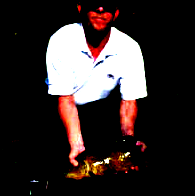

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

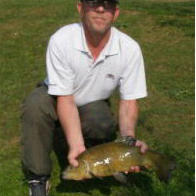

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

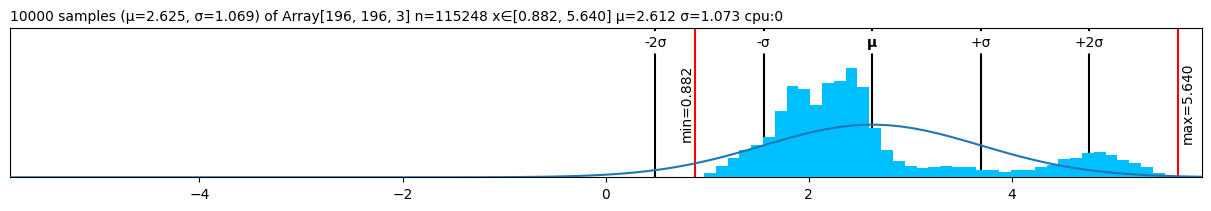

In [ ]:
(numbers+3).plt

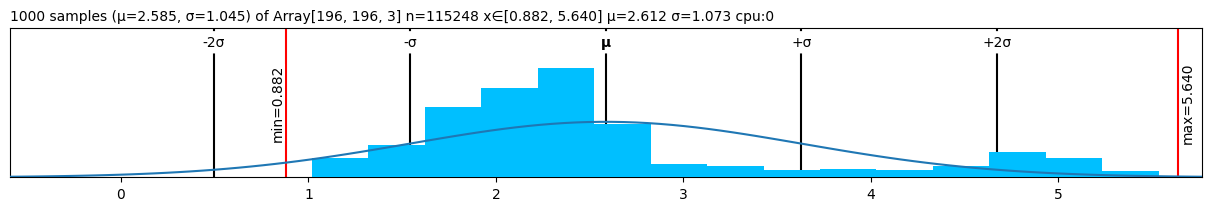

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

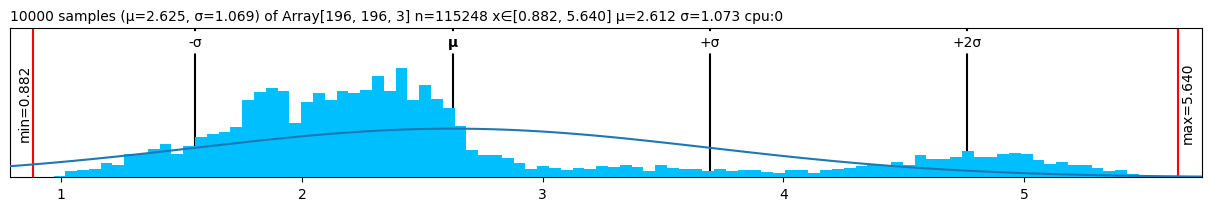

In [ ]:
(numbers+3).plt(center="range")

## See the `.chans`

In [ ]:
# .chans will map values betwen [-1,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = jnp.array(in_stats[0])
std = jnp.array(in_stats[1])
numbers_01 = (numbers*std + mean)
numbers_01

Array[196, 196, 3] n=115248 (0.4Mb) x∈[0., 1.000] μ=0.361 σ=0.248 cpu:0

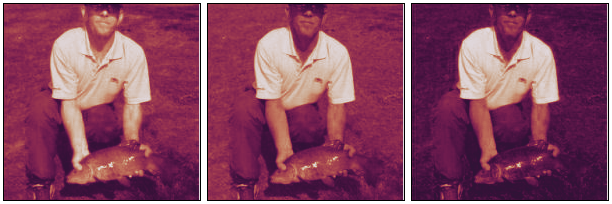

In [ ]:
numbers_01.chans

In [ ]:
# |hide
# Let's try with a Convolutional Neural Network

In [ ]:
# |hide
# # |eval:false
# from torchvision.models import vgg11

In [ ]:
# |hide
# # |eval:false
# features: torch.nn.Sequential = vgg11().features

# # I saved the first 5 layers in "features.pt"
# _ = features.load_state_dict(torch.load("../features.pt"), strict=False)

In [ ]:
# |hide
# # |eval:false
# # Activatons of the second max pool layer of VGG11
# acts = (features[:6](numbers[None])[0]/2) # /2 to reduce clipping
# acts

In [ ]:
# |hide
# # |eval:false
# acts[:4].chans(cmap="coolwarm", scale=4)

## Grouping

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (jnp.stack([numbers]*8) + jnp.linspace(-2, 2, 8)[:,None,None,None])
eight_images = (eight_images
                     *jnp.array(in_stats[1])
                     +jnp.array(in_stats[0])
                ).clip(0,1).reshape(2,2,2,196,196,3)

eight_images

Array[2, 2, 2, 196, 196, 3] n=921984 (3.5Mb) x∈[0., 1.000] μ=0.382 σ=0.319 cpu:0

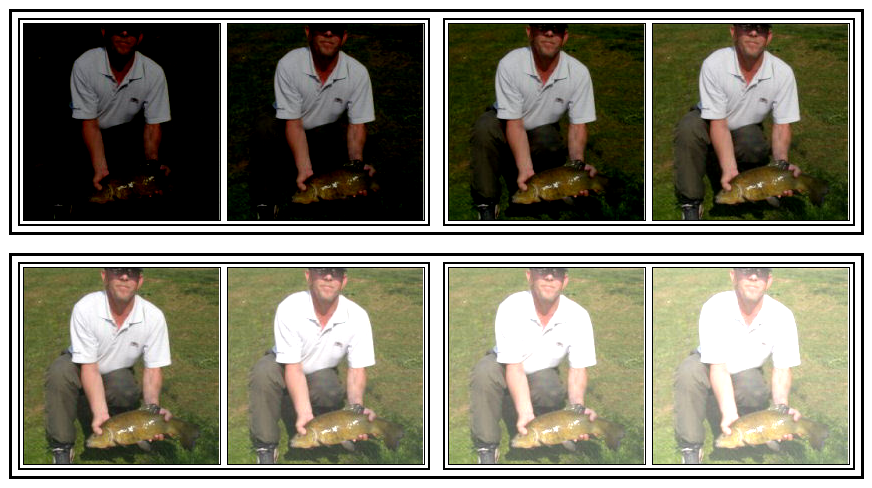

In [ ]:
eight_images.rgb

## Sharding

In [ ]:
# |eval: false
assert jax.__version_info__[0] == 0
from jax.sharding import NamedSharding, Mesh, PartitionSpec as P
from jax.experimental import mesh_utils

# Create a mesh with named axes
devices = mesh_utils.create_device_mesh((4, 2))
mesh = Mesh(devices, axis_names=('y', 'x'))

# Create sharding with PartitionSpec
sharding = NamedSharding(mesh, P('y', 'x'))

x = jax.random.normal(jax.random.PRNGKey(0), (8192, 8192))
y = jax.device_put(x, sharding)

jax.debug.visualize_array_sharding(y)

print(y)

                        
   CPU 0       CPU 1    
                        
                        
   CPU 2       CPU 3    
                        
                        
   CPU 4       CPU 5    
                        
                        
   CPU 6       CPU 7    
                        

Array[8192, 8192] n=67108864 (0.2Gb) x∈[-5.420, 5.220] μ=1.508e-05 σ=1.000 S[y,x] 4×2 cpu:0-7


In [ ]:
# |hide
# # |eval:false
# # Weights of the second conv layer of VGG11
# features[3].weight

In [ ]:
# |hide
# I want +/- 2σ to fall in the range [-1..1]

In [ ]:
# |hide
# # |eval:false
# weights = features[3].weight.data
# weights = weights / (2*2*weights.std()) # *2 because we want 2σ on both sides, so 4σ
# # weights += weights.std() * 2
# weights.plt

In [ ]:
# |hide
# # |eval:false
# # Weights of the second conv layer (64ch -> 128ch) of VGG11,
# # grouped per output channel.
# weights.chans(frame_px=1, gutter_px=0)

In [ ]:
# |hide
# It's a bit hard to see. Scale up 10x, but onyl show the first 4 filters.

In [ ]:
# |hide
# # |eval:false
# weights[:4].chans(frame_px=1, gutter_px=0, scale=10)

## Options | [Docs](utils.config.html)

In [ ]:
from lovely_jax import set_config, config


In [ ]:
set_config(precision=5, sci_mode=True, color=False)
jnp.array([1., 2, jnp.nan])

Array[3] μ=1.50000e+00 σ=5.00000e-01 NaN! cpu:0 [1.00000e+00, 2.00000e+00, nan]

In [ ]:
set_config(precision=None, sci_mode=None, color=None) # None -> Reset to defaults

In [ ]:
print(jnp.array([1., 2]))
# Or with config context manager.
with config(sci_mode=True, precision=5):
    print(jnp.array([1., 2]))

print(jnp.array([1., 2]))

Array[2] μ=1.500 σ=0.500 cpu:0 [1.000, 2.000]
Array[2] μ=1.50000e+00 σ=5.00000e-01 cpu:0 [1.00000e+00, 2.00000e+00]
Array[2] μ=1.500 σ=0.500 cpu:0 [1.000, 2.000]


## Without `.monkey_patch`

In [ ]:
lj.lovely(spicy)

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! cpu:0

In [ ]:
lj.lovely(spicy, verbose=True)

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! cpu:0
Array([[-3.5405432e+03, -1.9747897e-05,            inf,           -inf,
                   nan, -9.8527229e-01],
       [-4.0542859e-01, -3.0252096e-01, -8.8069713e-01, -4.3967807e-01,
        -3.0252096e-01, -7.7612197e-01]], dtype=float32)

In [ ]:
lj.lovely(numbers, depth=1)

Array[196, 196, 3] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073 cpu:0
  Array[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 cpu:0
  Array[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 cpu:0
  Array[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 cpu:0
  Array[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 cpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 cpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 cpu:0
  Array[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 cpu:0
  Array[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 cpu:0
  Array[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 cpu:0
  ...

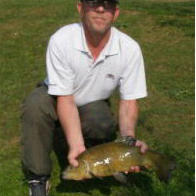

In [ ]:
lj.rgb(numbers, in_stats)

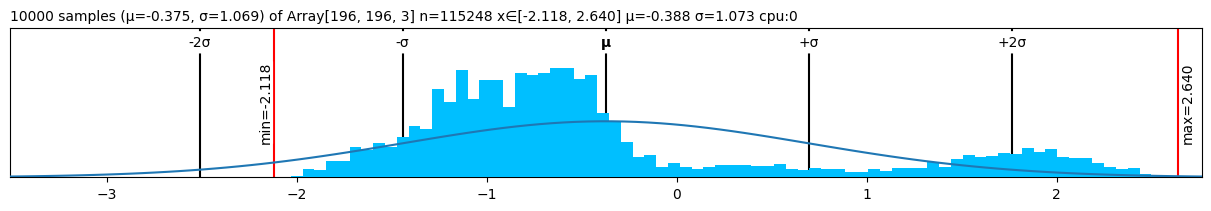

In [ ]:
lj.plot(numbers, center="mean")

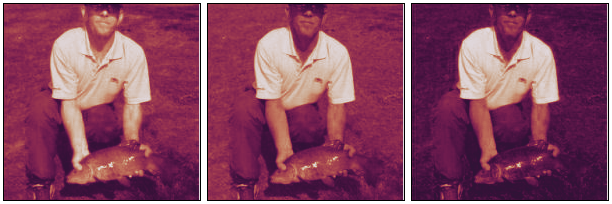

In [ ]:
lj.chans(numbers_01)

## Matplotlib integration | [Docs](matplotlib.html)

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }}
%config InlineBackend.print_figure_kwargs = kwargs

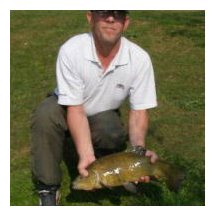

In [ ]:
numbers.rgb(in_stats).fig # matplotlib figure

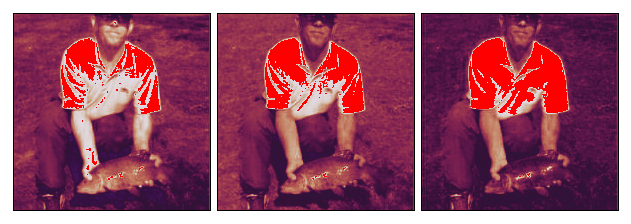

In [ ]:
(numbers*0.3+0.5).chans.fig # matplotlib figure

In [ ]:
numbers.plt.fig.savefig('pretty.svg') # Save it

In [ ]:
!file pretty.svg; rm pretty.svg

pretty.svg: SVG Scalable Vector Graphics image


### Add content to existing Axes

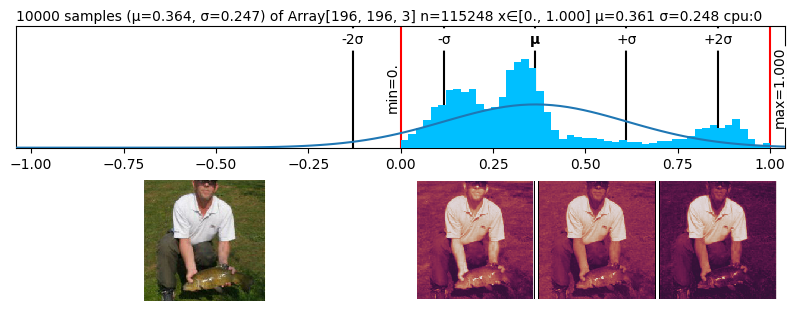

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

numbers_01.plt(ax=ax1)
numbers_01.rgb(ax=ax2)
numbers_01.chans(ax=ax3);

## Import hook
Lovely JAX installs an import hook. Set `LOVELY_JAX=1`, and it will load automatically, no need to modify the code:

> Note: You can now set it globally. The installed import hook will trigger only when JAX is imported.

```python
import jax

x = jax.random.normal(jax.random.PRNGKey(0), (4, 16))
print(x)
```

```bash
LOVELY_JAX=1 python test.py
```

```
x: Array[4, 16] n=64 x∈[-1.955, 2.180] μ=0.031 σ=0.960 cpu:0
```

This is especially useful in combination with [Better Exceptions](https://github.com/Qix-/better-exceptions):

> Note: Better exceptions seems to be not working with Python 3.13: https://github.com/Qix-/better-exceptions/issues/134

```python
import jax
import jax.numpy as jnp

x = jax.random.normal(jax.random.PRNGKey(0), (4, 16))
print(f"x: {x}")

w = jax.random.normal(jax.random.PRNGKey(1), (15, 8))
y = jnp.matmul(x, w)  # Dimension mismatch
```

```bash
BETTER_EXCEPTIONS=1 LOVELY_JAX=1 python test.py
```

```
x: Array[4, 16] n=64 x∈[-1.955, 2.180] μ=0.031 σ=0.960 cpu:0
Traceback (most recent call last):
  File "/home/xl0/work/projects/lovely-jax/test.py", line 9, in <module>
    y = jnp.matmul(x, w)  # Dimension mismatch
        │          │  └ Array[15, 8] n=120 x∈[-2.746, 2.608] μ=-0.003 σ=1.072 cpu:0
        │          └ Array[4, 16] n=64 x∈[-1.955, 2.180] μ=0.031 σ=0.960 cpu:0
        └ <module 'jax.numpy' from '...'>
  File "...jax/_src/numpy/tensor_contractions.py", line 254, in matmul
    out = lax.dot_general(
TypeError: dot_general requires contracting dimensions to have the same shape, got (16,) and (15,).
```